In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## BLS Dataset

In [2]:
bls_df = pd.read_excel("monthly-listing-3.xlsx",header=1)
bls_df = bls_df[~bls_df['States'].isna()]
bls_df["NAICS_col"] = bls_df["Industry code[1]"].astype(str).str[:2]
bls_df["start_year"] = pd.DatetimeIndex(bls_df["Work stoppage beginning date"]).year
bls_df["end_year"] = pd.DatetimeIndex(bls_df["Work stoppage ending date"]).year
bls_df = bls_df[bls_df['start_year'] >= 1993]
bls_df.head()

,Organizations involved,States,Areas,Ownership,Industry code[1],Union,Union acronym,Union Local,Bargaining unit,Work stoppage beginning date,Work stoppage ending date,Number of workers[2],"Days idle, cumulative for this work stoppage[3]",Note,NAICS_col,start_year,end_year
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1993-01-19,1993-01-19,21000.0,21000.0,The union name was changed to the Society of P...,33,1993,1993
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1993-01-24,1993-05-20,1000.0,83000.0,"Boston Gas Company also does business as ""Nati...",22,1993,1993
3,Bituminous Coal Operators Association,"IN, IL, KY, WV",Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,1993-02-02,1993-03-02,6700.0,103400.0,"Number of workers involved increased from 5,00...",21,1993,1993
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,1993-03-02,1993-03-03,6800.0,13600.0,NaN,33,1993,1993
5,Allied Signal Corp.,VA,Hopewell,Private industry,325222,International Brotherhood of Teamsters,IBT,NaN,NaN,1993-03-22,1993-04-21,1600.0,36800.0,NaN,32,1993,1993


In [3]:
testing_df = bls_df.copy()
for index, row in testing_df.iterrows():
    if "," in row['States']:
        states_list = row['States'].split(",")
        testing_df.loc[index, 'States'] = states_list[0]
        for i in np.arange(1,len(states_list)):
            row_2 = row
            row_2['States'] = states_list[i]
            testing_df.loc[testing_df.index.max()+1, :] = row_2
bls_df = testing_df
bls_df.head()

,Organizations involved,States,Areas,Ownership,Industry code[1],Union,Union acronym,Union Local,Bargaining unit,Work stoppage beginning date,Work stoppage ending date,Number of workers[2],"Days idle, cumulative for this work stoppage[3]",Note,NAICS_col,start_year,end_year
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1993-01-19,1993-01-19,21000.0,21000.0,The union name was changed to the Society of P...,33,1993.0,1993.0
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1993-01-24,1993-05-20,1000.0,83000.0,"Boston Gas Company also does business as ""Nati...",22,1993.0,1993.0
3,Bituminous Coal Operators Association,IN,Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,1993-02-02,1993-03-02,6700.0,103400.0,"Number of workers involved increased from 5,00...",21,1993.0,1993.0
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,1993-03-02,1993-03-03,6800.0,13600.0,NaN,33,1993.0,1993.0
5,Allied Signal Corp.,VA,Hopewell,Private industry,325222,International Brotherhood of Teamsters,IBT,NaN,NaN,1993-03-22,1993-04-21,1600.0,36800.0,NaN,32,1993.0,1993.0


In [4]:
bls_df['States'] = bls_df['States'].str.strip()
bls_df = bls_df[bls_df['States'].str.len()<=2]
bls_df.head()

,Organizations involved,States,Areas,Ownership,Industry code[1],Union,Union acronym,Union Local,Bargaining unit,Work stoppage beginning date,Work stoppage ending date,Number of workers[2],"Days idle, cumulative for this work stoppage[3]",Note,NAICS_col,start_year,end_year
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1993-01-19,1993-01-19,21000.0,21000.0,The union name was changed to the Society of P...,33,1993.0,1993.0
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1993-01-24,1993-05-20,1000.0,83000.0,"Boston Gas Company also does business as ""Nati...",22,1993.0,1993.0
3,Bituminous Coal Operators Association,IN,Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,1993-02-02,1993-03-02,6700.0,103400.0,"Number of workers involved increased from 5,00...",21,1993.0,1993.0
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,1993-03-02,1993-03-03,6800.0,13600.0,NaN,33,1993.0,1993.0
5,Allied Signal Corp.,VA,Hopewell,Private industry,325222,International Brotherhood of Teamsters,IBT,NaN,NaN,1993-03-22,1993-04-21,1600.0,36800.0,NaN,32,1993.0,1993.0


In [5]:
bls_df['num_years'] = bls_df["end_year"] - bls_df["start_year"] + 1
bls_df['num_years'].sum()

915.0

In [6]:
testing_df = bls_df.copy()
for index, row in testing_df.iterrows():
    if row['num_years'] > 1:
        i = row['num_years']-1
        start_year = row['start_year']
        while i != 0:
            row_2 = row
            row_2['start_year'] = start_year + i
            testing_df.loc[testing_df.index.max()+1, :] = row_2
            i = i - 1
bls_df = testing_df
bls_df.head()

,Organizations involved,States,Areas,Ownership,Industry code[1],Union,Union acronym,Union Local,Bargaining unit,Work stoppage beginning date,Work stoppage ending date,Number of workers[2],"Days idle, cumulative for this work stoppage[3]",Note,NAICS_col,start_year,end_year,num_years
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1993-01-19,1993-01-19,21000.0,21000.0,The union name was changed to the Society of P...,33,1993.0,1993.0,1.0
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1993-01-24,1993-05-20,1000.0,83000.0,"Boston Gas Company also does business as ""Nati...",22,1993.0,1993.0,1.0
3,Bituminous Coal Operators Association,IN,Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,1993-02-02,1993-03-02,6700.0,103400.0,"Number of workers involved increased from 5,00...",21,1993.0,1993.0,1.0
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,1993-03-02,1993-03-03,6800.0,13600.0,NaN,33,1993.0,1993.0,1.0
5,Allied Signal Corp.,VA,Hopewell,Private industry,325222,International Brotherhood of Teamsters,IBT,NaN,NaN,1993-03-22,1993-04-21,1600.0,36800.0,NaN,32,1993.0,1993.0,1.0


In [7]:
bls_df.to_csv('bls_testing.csv')

In [8]:
grouped_bls_df = bls_df.groupby(['States','start_year'])['Number of workers[2]'].sum().reset_index()
grouped_bls_df

,States,start_year,Number of workers[2]
0,AK,1994.0,2900.0
1,AK,1999.0,1000.0
2,AL,1993.0,1200.0
3,AL,1994.0,3200.0
4,AL,1996.0,1100.0
...,...,...,...
486,WV,2003.0,3200.0
487,WV,2015.0,2200.0
488,WV,2016.0,2200.0
489,WV,2018.0,36400.0


## FMCS Dataset

In [9]:
FMCS_df = pd.read_csv("work_stoppages.csv")
FMCS_df = FMCS_df[~FMCS_df['City, State'].isna()]
FMCS_df = FMCS_df[FMCS_df['# Idled'] >= 1000]
FMCS_df["start_year"] = pd.DatetimeIndex(FMCS_df["Start Date"]).year
FMCS_df["end_year"] = pd.DatetimeIndex(FMCS_df["End Date"]).year
FMCS_df = FMCS_df[~FMCS_df['City, State'].str.endswith(", ")]
FMCS_df['State'] = FMCS_df['City, State'].str[-2:]
FMCS_df = FMCS_df[FMCS_df['start_year'] >= 1993]
FMCS_df = FMCS_df[~(FMCS_df["Start Date"] == FMCS_df["End Date"])]
FMCS_df.head()

,Employer,Union,Union Local,Case Number,BU,NAICS,Industry,"City, State",# Idled,Start Date,End Date,Duration,start_year,end_year,State
6814,Caterpillar Inc,UAW MULTI,NaN,1991JU003706,NaN,NaN,Manufacturing,"Peoria, IL",11500.0,6/21/94,12/4/95,NaN,1994,1995.0,IL
7365,Douglas Aircraft Company (two Locations),IAM 720,NaN,1992KR003410,NaN,NaN,Manufacturing,"Torrance, CA",6759.0,3/2/93,3/3/93,NaN,1993,1993.0,CA
7497,Boeing Company The,SPEEA,NaN,1993BP000528,NaN,NaN,Manufacturing,"Seattle, WA",7000.0,1/21/93,1/22/93,NaN,1993,1993.0,WA
7522,Independent Bituminous Coal Bargaining Allianc...,UMW,NaN,1993CN000462,NaN,NaN,"Mining, Quarrying and Oil & Gas Extraction","Birmingham, AL",1200.0,7/14/93,7/16/93,NaN,1993,1993.0,AL
7524,Fieldcrest Cannon Inc (section 28),ACTWU BI COUNTY N NC & S GA DIST,NaN,1993CN000511,NaN,NaN,Manufacturing,"Eden, NC",1500.0,5/17/93,5/19/93,NaN,1993,1993.0,NC


In [10]:
end_years_list = pd.DatetimeIndex(pd.DatetimeIndex(FMCS_df[(FMCS_df["end_year"].isna()) & ~(FMCS_df["Duration"].isna())]['Start Date']) + pd.to_timedelta(
    FMCS_df[(FMCS_df["end_year"].isna()) & ~(FMCS_df["Duration"].isna())]['Duration'], unit='D')).year
FMCS_df.loc[(FMCS_df["end_year"].isna()) & ~(FMCS_df["Duration"].isna()), "end_year"] = end_years_list
FMCS_df.loc[(FMCS_df["end_year"].isna()), "end_year"] = FMCS_df.loc[(FMCS_df["end_year"].isna()), "start_year"]
FMCS_df.loc[(FMCS_df["end_year"].isna()), :]


,Employer,Union,Union Local,Case Number,BU,NAICS,Industry,"City, State",# Idled,Start Date,End Date,Duration,start_year,end_year,State


In [11]:
FMCS_df['num_years'] = FMCS_df["end_year"] - FMCS_df["start_year"] + 1
FMCS_df.head()

,Employer,Union,Union Local,Case Number,BU,NAICS,Industry,"City, State",# Idled,Start Date,End Date,Duration,start_year,end_year,State,num_years
6814,Caterpillar Inc,UAW MULTI,NaN,1991JU003706,NaN,NaN,Manufacturing,"Peoria, IL",11500.0,6/21/94,12/4/95,NaN,1994,1995.0,IL,2.0
7365,Douglas Aircraft Company (two Locations),IAM 720,NaN,1992KR003410,NaN,NaN,Manufacturing,"Torrance, CA",6759.0,3/2/93,3/3/93,NaN,1993,1993.0,CA,1.0
7497,Boeing Company The,SPEEA,NaN,1993BP000528,NaN,NaN,Manufacturing,"Seattle, WA",7000.0,1/21/93,1/22/93,NaN,1993,1993.0,WA,1.0
7522,Independent Bituminous Coal Bargaining Allianc...,UMW,NaN,1993CN000462,NaN,NaN,"Mining, Quarrying and Oil & Gas Extraction","Birmingham, AL",1200.0,7/14/93,7/16/93,NaN,1993,1993.0,AL,1.0
7524,Fieldcrest Cannon Inc (section 28),ACTWU BI COUNTY N NC & S GA DIST,NaN,1993CN000511,NaN,NaN,Manufacturing,"Eden, NC",1500.0,5/17/93,5/19/93,NaN,1993,1993.0,NC,1.0


In [12]:
testing_df = FMCS_df.copy()
for index, row in testing_df.iterrows():
    if row['num_years'] > 1:
        i = row['num_years']-1
        start_year = row['start_year']
        while i != 0:
            row_2 = row
            row_2['start_year'] = start_year + i
            testing_df.loc[testing_df.index.max()+1, :] = row_2
            i = i - 1
FMCS_df = testing_df
FMCS_df

,Employer,Union,Union Local,Case Number,BU,NAICS,Industry,"City, State",# Idled,Start Date,End Date,Duration,start_year,end_year,State,num_years
6814,Caterpillar Inc,UAW MULTI,NaN,1991JU003706,NaN,NaN,Manufacturing,"Peoria, IL",11500.0,6/21/94,12/4/95,NaN,1994.0,1995.0,IL,2.0
7365,Douglas Aircraft Company (two Locations),IAM 720,NaN,1992KR003410,NaN,NaN,Manufacturing,"Torrance, CA",6759.0,3/2/93,3/3/93,NaN,1993.0,1993.0,CA,1.0
7497,Boeing Company The,SPEEA,NaN,1993BP000528,NaN,NaN,Manufacturing,"Seattle, WA",7000.0,1/21/93,1/22/93,NaN,1993.0,1993.0,WA,1.0
7522,Independent Bituminous Coal Bargaining Allianc...,UMW,NaN,1993CN000462,NaN,NaN,"Mining, Quarrying and Oil & Gas Extraction","Birmingham, AL",1200.0,7/14/93,7/16/93,NaN,1993.0,1993.0,AL,1.0
7524,Fieldcrest Cannon Inc (section 28),ACTWU BI COUNTY N NC & S GA DIST,NaN,1993CN000511,NaN,NaN,Manufacturing,"Eden, NC",1500.0,5/17/93,5/19/93,NaN,1993.0,1993.0,NC,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14338,Charter/Spectrum,IBEW 3,3,2.01709E+11,1800.0,54.0,"Professional, Scientific &Tech Serv","New York, NJ",1800.0,3/29/17,NaN,1130.0,2020.0,2020.0,NJ,4.0
14339,Charter/Spectrum,IBEW 3,3,2.01709E+11,1800.0,54.0,"Professional, Scientific &Tech Serv","New York, NJ",1800.0,3/29/17,NaN,1130.0,2019.0,2020.0,NJ,4.0
14340,Charter/Spectrum,IBEW 3,3,2.01709E+11,1800.0,54.0,"Professional, Scientific &Tech Serv","New York, NJ",1800.0,3/29/17,NaN,1130.0,2018.0,2020.0,NJ,4.0
14341,National Grid,USW 12003,12003,2018N1001656,875.0,22.0,Utilities,"Waltham, MA",1200.0,6/25/18,1/7/19,197.0,2019.0,2019.0,MA,2.0


In [13]:
FMCS_df = FMCS_df[~FMCS_df.duplicated(['Employer','# Idled','start_year'])]
FMCS_df.head()

,Employer,Union,Union Local,Case Number,BU,NAICS,Industry,"City, State",# Idled,Start Date,End Date,Duration,start_year,end_year,State,num_years
6814,Caterpillar Inc,UAW MULTI,NaN,1991JU003706,NaN,NaN,Manufacturing,"Peoria, IL",11500.0,6/21/94,12/4/95,NaN,1994.0,1995.0,IL,2.0
7365,Douglas Aircraft Company (two Locations),IAM 720,NaN,1992KR003410,NaN,NaN,Manufacturing,"Torrance, CA",6759.0,3/2/93,3/3/93,NaN,1993.0,1993.0,CA,1.0
7497,Boeing Company The,SPEEA,NaN,1993BP000528,NaN,NaN,Manufacturing,"Seattle, WA",7000.0,1/21/93,1/22/93,NaN,1993.0,1993.0,WA,1.0
7522,Independent Bituminous Coal Bargaining Allianc...,UMW,NaN,1993CN000462,NaN,NaN,"Mining, Quarrying and Oil & Gas Extraction","Birmingham, AL",1200.0,7/14/93,7/16/93,NaN,1993.0,1993.0,AL,1.0
7524,Fieldcrest Cannon Inc (section 28),ACTWU BI COUNTY N NC & S GA DIST,NaN,1993CN000511,NaN,NaN,Manufacturing,"Eden, NC",1500.0,5/17/93,5/19/93,NaN,1993.0,1993.0,NC,1.0


In [14]:
FMCS_df.to_csv('FMCS_testing.csv')

In [15]:
FMCS_df = pd.read_csv('FMCS_testing_2.csv')
FMCS_df = FMCS_df.iloc[:,1:]
FMCS_df

,Employer,Union,Union Local,Case Number,BU,NAICS,Industry,"City, State",# Idled,Start Date,End Date,Duration,start_year,end_year,State,num_years
0,Caterpillar Inc,UAW MULTI,NaN,1991JU003706,NaN,NaN,Manufacturing,"Peoria, IL",14000,6/21/94,12/4/95,NaN,1994,1995,IL,2
1,Douglas Aircraft Company (two Locations),IAM 720,NaN,1992KR003410,NaN,NaN,Manufacturing,"Torrance, CA",6800,3/2/93,3/3/93,NaN,1993,1993,CA,1
2,Boeing Company The,SPEEA,NaN,1993BP000528,NaN,NaN,Manufacturing,"Seattle, WA",21000,1/21/93,1/22/93,NaN,1993,1993,WA,1
3,Independent Bituminous Coal Bargaining Allianc...,UMW,NaN,1993CN000462,NaN,NaN,"Mining, Quarrying and Oil & Gas Extraction","Birmingham, AL",6700,7/14/93,7/16/93,NaN,1993,1993,AL,1
4,Fieldcrest Cannon Inc (section 28),ACTWU BI COUNTY N NC & S GA DIST,NaN,1993CN000511,NaN,NaN,Manufacturing,"Eden, NC",2000,5/17/93,5/19/93,NaN,1993,1993,NC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,FairPoint Communications - Yelm,IBEW Local SCT-9,NaN,2014N0502678,NaN,NaN,Utilities,"Various - ME, NH, VT, NH",1700,10/17/14,2/24/15,NaN,2015,2015,NH,2
372,Charter/Spectrum,IBEW 3,3,2.02E+11,1800.0,54.0,"Professional, Scientific &Tech Serv","New York, NJ",1800,3/29/17,NaN,1130.0,2020,2020,NJ,4
373,Charter/Spectrum,IBEW 3,3,2.02E+11,1800.0,54.0,"Professional, Scientific &Tech Serv","New York, NJ",1800,3/29/17,NaN,1130.0,2019,2020,NJ,4
374,Charter/Spectrum,IBEW 3,3,2.02E+11,1800.0,54.0,"Professional, Scientific &Tech Serv","New York, NJ",1800,3/29/17,NaN,1130.0,2018,2020,NJ,4


In [16]:
grouped_fmcs_df = FMCS_df.groupby(["State","start_year"])["# Idled"].sum().reset_index()
grouped_fmcs_df.head()

,State,start_year,# Idled
0,AK,1999,1000
1,AL,1993,6700
2,AL,1994,2000
3,AL,1996,1100
4,AL,1997,1000


## Union Member Dataset

In [17]:
union_df = pd.read_csv("union_membership.csv")
union_df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [18]:
us_state_to_abbrev_union = {"State" : {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}}
union_df = union_df.replace(us_state_to_abbrev_union)
union_df_priv = union_df[union_df['Sector'] == 'Private'][["Year","State","% Mem",'Employment (in 1000s)']]
union_df_priv.head()

,Year,State,% Mem,Employment (in 1000s)
2,1993,AL,12.0%,"1,381"
7,1993,AK,10.3%,165
12,1993,AZ,5.2%,"1,212"
17,1993,AR,7.5%,778
22,1993,CA,11.6%,"9,967"


## Political Lean Dataset

In [19]:
poli_df = pd.read_csv("1976-2020-house.csv")
poli_df = poli_df[poli_df['year'] >= 1993]
poli_df = poli_df[~poli_df['state_po'].isin(['DC'])]
poli_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
11083,1994,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,DON WOMACK,DEMOCRAT,False,TOTAL,50227,153767,False,20220331,False
11084,1994,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,SONNY CALLAHAN,REPUBLICAN,False,TOTAL,103431,153767,False,20220331,False
11085,1994,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,WRITEIN,NaN,True,TOTAL,109,153767,False,20220331,False
11086,1994,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,BRIAN DOWLING,DEMOCRAT,False,TOTAL,44694,169213,False,20220331,False
11087,1994,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,TERRY EVERETT,REPUBLICAN,False,TOTAL,124465,169213,False,20220331,False


In [20]:
votes_by_party = poli_df.groupby(['state_po','year','party'])['candidatevotes'].sum().reset_index()
votes_by_party = votes_by_party[votes_by_party['party'] == 'REPUBLICAN']
votes_by_party = votes_by_party.set_index(['state_po','year']).drop(columns=['party'])
total_votes = poli_df.groupby(['state_po','year','district'])['totalvotes'].first().reset_index()
total_votes = total_votes.groupby(['state_po','year'])['totalvotes'].sum().reset_index()
total_votes = total_votes.set_index(['state_po','year'])
votes_by_party.head(), total_votes.head()

(               candidatevotes
 state_po year                
 AK       1994          118537
          1996          138834
          1998          139676
          2000          190862
          2002          169685,
                totalvotes
 state_po year            
 AK       1994      208240
          1996      233700
          1998      223300
          2000      274393
          2002      227725)

In [21]:
poli_df.loc[(poli_df['state_po'] == 'MN') & (poli_df['year'].isin([1992])) & (poli_df['party'].isin(["INDEPENDENT-REPUBLICAN"])),'party'] = "REPUBLICAN"
poli_df.loc[(poli_df['state_po'] == 'HI') & (poli_df['year'].isin([1982])),:]['party'].unique()
poli_df.loc[(poli_df['state_po'] == 'DC') & (poli_df['year'].isin([2020])),:]['party'].unique()
poli_df.loc[(poli_df['state_po'] == 'VT') & (poli_df['year'].isin([2008,2016])),:]['party'].unique()


array(['INDEPENDENT', 'LIBERTY UNION', 'ENERGY INDEPENDENCE', 'DEMOCRAT',
       'PROGRESSIVE', nan], dtype=object)

In [22]:
merged_poli_df = total_votes.merge(votes_by_party, left_index=True, right_index=True, how="left")
merged_poli_df['candidatevotes'] = merged_poli_df['candidatevotes'].fillna(0)
merged_poli_df['prop_rep_votes'] = merged_poli_df['candidatevotes']/merged_poli_df['totalvotes']
merged_poli_df

totalvotes  candidatevotes  prop_rep_votes
state_po year                                            
AK       1994      208240        118537.0        0.569233
         1996      233700        138834.0        0.594069
         1998      223300        139676.0        0.625508
         2000      274393        190862.0        0.695579
         2002      227725        169685.0        0.745131
...                   ...             ...             ...
WY       2012      250700        166452.0        0.663949
         2014      171153        113038.0        0.660450
         2016      258788        156176.0        0.603490
         2018      201245        127963.0        0.635857
         2020      278503        185732.0        0.666894

[700 rows x 3 columns]

In [23]:
full_poli_df = merged_poli_df.reset_index()
for state in full_poli_df['state_po'].unique():
    for year in np.arange(1995,2020,2):
        try:
            full_poli_df.loc[full_poli_df.index.max()+1,:] = full_poli_df.loc[
                (full_poli_df['state_po'] == state) & (full_poli_df['year'] == year-1),:].iloc[0]
            full_poli_df.loc[full_poli_df.index.max(),'year']=year
        except:
            print(state,year)
full_poli_df.head()        


,state_po,year,totalvotes,candidatevotes,prop_rep_votes
0,AK,1994.0,208240.0,118537.0,0.569233
1,AK,1996.0,233700.0,138834.0,0.594069
2,AK,1998.0,223300.0,139676.0,0.625508
3,AK,2000.0,274393.0,190862.0,0.695579
4,AK,2002.0,227725.0,169685.0,0.745131


## Minimum Wage Dataset

In [24]:
min_wage_df = pd.read_csv("min_wage.csv",encoding='cp1252')
min_wage_df = min_wage_df[min_wage_df['Year'] >= 1993]
min_wage_df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
1350,1993,Alabama,0.00,0.00,4.25,7.61,4.25,7.61,144.50,...,0.00,0.00,0.00,0.00,NaN
1351,1993,Alaska,4.75,8.50,4.25,7.61,4.75,8.50,144.50,4.75,4.75,8.50,4.75,8.50,NaN
1352,1993,Arizona,0.00,0.00,4.25,7.61,4.25,7.61,144.50,...,0.00,0.00,0.00,0.00,NaN
1353,1993,Arkansas,3.65,6.53,4.25,7.61,4.25,7.61,144.50,3.65,3.65,6.53,3.65,6.53,NaN
1354,1993,California,4.25,7.61,4.25,7.61,4.25,7.61,144.50,4.25,4.25,7.61,4.25,7.61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25,7.25,7.25,7.25,[c]
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50,13.50,13.50,13.50,NaN
2859,2020,West Virginia,8.75,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75,8.75,8.75,8.75,NaN
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25,7.25,7.25,7.25,NaN


In [25]:
us_state_to_abbrev_min_wage = {"State" : {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}}
min_wage_df = min_wage_df.replace(us_state_to_abbrev_min_wage)
min_wage_df.sort_values(['State','Year'],inplace=True)
min_wage_df = min_wage_df.reset_index().drop(columns=['index'])
min_wage_df.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1993,AK,4.75,8.50,4.25,7.61,4.75,8.50,144.5,4.75,4.75,8.50,4.75,8.50,NaN
1,1994,AK,4.75,8.29,4.25,7.42,4.75,8.29,148.2,4.75,4.75,8.29,4.75,8.29,NaN
2,1995,AK,4.75,8.06,4.25,7.21,4.75,8.06,152.4,4.75,4.75,8.06,4.75,8.06,NaN
3,1996,AK,4.75,7.83,4.25,7.01,4.75,7.83,156.9,4.75,4.75,7.83,4.75,7.83,NaN
4,1997,AK,5.25,8.46,4.75,7.66,5.25,8.46,160.5,5.25,5.25,8.46,5.25,8.46,NaN


## Nearest States Dataset

In [26]:
distances_df = pd.read_csv("distances_df.csv")
distances_df.head()

,state,latitude,longitude,Closest State #1,Distance to Closest State #1,Closest State #2,Distance to Closest State #2,Closest State #3,Distance to Closest State #3,Closest State #4,Distance to Closest State #4,Closest State #5,Distance to Closest State #5
0,AL,32.7794,-86.8287,MS,165.334460,GA,197.487904,TN,213.954618,LA,325.712907,KY,339.003175
1,AK,64.0685,-152.2782,WA,1663.916968,OR,1861.858430,MT,1985.735915,ID,1995.169309,ND,2237.421669
2,AZ,34.2744,-111.6602,NM,317.276353,UT,346.924962,NV,444.202213,CO,470.340950,CA,482.459726
3,AR,34.8938,-92.4426,MS,218.135844,MO,238.775500,LA,264.851958,OK,289.663758,TN,350.279840
4,CA,37.1841,-119.4696,NV,213.785465,UT,448.579321,OR,469.217131,AZ,482.459726,ID,556.046610


## State Inflation Dataset

In [27]:
state_inflation_df = pd.read_csv("statecpi_beta.csv")
for i in ['pi_nt','pi_t','pi']:
    state_inflation_df[i + "_prop"] = state_inflation_df[i]/100+1
state_inflation_df = (state_inflation_df.groupby(['state','year'])[['pi_nt_prop','pi_t_prop','pi_prop']].agg(np.prod)-1)*100
state_inflation_df.rename(columns={'pi_nt_prop': 'pi_nt','pi_t_prop': 'pi_t','pi_prop': 'pi'},inplace=True)
state_inflation_df.reset_index(inplace=True)
state_inflation_df.head()

,state,year,pi_nt,pi_t,pi
0,Alabama,1989,15.782732,18.149607,17.063328
1,Alabama,1990,13.691798,16.391293,15.103246
2,Alabama,1991,24.342764,5.256562,15.858694
3,Alabama,1992,9.125672,-0.824136,5.000021
4,Alabama,1993,13.388873,5.596229,10.185112


In [28]:
us_state_inf_to_abbrev = {"state" : {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}}
state_inflation_df = state_inflation_df.replace(us_state_inf_to_abbrev)
state_inflation_df

,state,year,pi_nt,pi_t,pi
0,AL,1989,15.782732,18.149607,17.063328
1,AL,1990,13.691798,16.391293,15.103246
2,AL,1991,24.342764,5.256562,15.858694
3,AL,1992,9.125672,-0.824136,5.000021
4,AL,1993,13.388873,5.596229,10.185112
...,...,...,...,...,...
1170,WI,2013,10.199952,-1.088311,6.491816
1171,WI,2014,8.692873,2.716131,6.835408
1172,WI,2015,5.133358,-9.183445,-0.237336
1173,WI,2016,2.546422,-5.558837,-0.465041


## US Inflation Dataset

In [29]:
us_inf = pd.read_excel("us_inf.xlsx")
us_inf.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,1993,3.5,3.6,3.4,3.5,3.4,3.3,3.2,3.3,3.2,3.0,3.1,3.2,3.3,3.4,3.2
1,1994,2.9,2.8,2.9,2.8,2.8,2.9,2.9,2.9,3.0,2.9,2.8,2.6,2.8,2.8,2.9
2,1995,2.9,3.0,3.0,3.1,3.1,3.0,3.0,2.9,2.9,3.0,3.0,3.0,3.0,3.0,3.0
3,1996,3.0,2.9,2.8,2.7,2.7,2.7,2.7,2.6,2.7,2.6,2.6,2.6,2.7,2.7,2.7
4,1997,2.5,2.5,2.5,2.7,2.5,2.4,2.4,2.3,2.2,2.3,2.2,2.2,2.4,2.6,2.2


## Combining BLS and FMCS Datasets

In [30]:
lst = []
for x in grouped_bls_df['States'].unique():
    lst = lst + [x]
for x in grouped_fmcs_df['State'].unique():
    if x not in lst:
        lst = lst + [x]
for x in union_df_priv['State'].unique():
    if x not in lst:
        lst = lst + [x]
for x in full_poli_df['state_po'].unique():
    if x not in lst:
        lst = lst + [x]
print(lst)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'VI', 'SD', 'WY']


In [31]:
new_df = pd.DataFrame(columns=['State','Year','Strikers','FMCS Interest'])
new_df.loc[0,:] = ['AL',1990,1500,1950]
for state in lst:
    for year in np.arange(1993,2021):
        striking_workers = 0
        fmcs_workers = 0
        if len(grouped_bls_df[(grouped_bls_df['States'] == state) & (grouped_bls_df['start_year'] == year)]) == 1:
            striking_workers = grouped_bls_df[(grouped_bls_df['States'] == state) & (grouped_bls_df['start_year'] == year)]['Number of workers[2]'].iloc[0]
        elif len(grouped_bls_df[(grouped_bls_df['States'] == state) & (grouped_bls_df['start_year'] == year)]) > 1:
            print(state,year)
        if len(grouped_fmcs_df[(grouped_fmcs_df['State'] == state) & (grouped_fmcs_df['start_year'] == year)]) == 1:
            fmcs_workers = grouped_fmcs_df[(grouped_fmcs_df['State'] == state) & (grouped_fmcs_df['start_year'] == year)]['# Idled'].iloc[0]
        elif len(grouped_fmcs_df[(grouped_fmcs_df['State'] == state) & (grouped_fmcs_df['start_year'] == year)]) > 1:
            print(state,year)
        new_df.loc[new_df.index.max()+1,:] = [state,year,striking_workers,fmcs_workers]
new_df = new_df.iloc[1:,:]
new_df['valid strikers'] = new_df['Strikers'] - new_df['FMCS Interest']
new_df.head()


,State,Year,Strikers,FMCS Interest,valid strikers
1,AK,1993,0,0,0
2,AK,1994,2900.0,0,2900.0
3,AK,1995,0,0,0
4,AK,1996,0,0,0
5,AK,1997,0,0,0


In [32]:
union_list = []
emplyed_workers_list = []
for state in lst:
    for year in np.arange(1993,2021):
        sub_df = union_df_priv.loc[(union_df_priv['State'] == state) & (union_df_priv['Year'] == year)]
        if len(sub_df) > 1:
            print(state, year)
        if len(sub_df) == 1:
            num = float((union_df_priv.loc[(union_df_priv['State'] == state) & (union_df_priv['Year'] == year)]['% Mem'].iloc[0])[:-1])
            num_2 = 1000*float((union_df_priv.loc[(union_df_priv['State'] == state) & (union_df_priv['Year'] == year)]['Employment (in 1000s)'].iloc[0]).replace(",",""))
        if len(sub_df) == 0:
            num = np.nan
            num_2 = np.nan
        union_list = union_list + [num]
        emplyed_workers_list = emplyed_workers_list + [num_2]
new_df['Priv Union Members (%)'] = union_list
new_df['Employed Workers'] = emplyed_workers_list
new_df['Employed Workers not on strike'] = new_df['Employed Workers'] - new_df['valid strikers']
new_df['prop not on strike'] = new_df['Employed Workers not on strike']/new_df['Employed Workers']
new_df.head()


,State,Year,Strikers,FMCS Interest,valid strikers,Priv Union Members (%),Employed Workers,Employed Workers not on strike,prop not on strike
1,AK,1993,0,0,0,10.3,165000.0,165000.0,1.0
2,AK,1994,2900.0,0,2900.0,10.0,163000.0,160100.0,0.982209
3,AK,1995,0,0,0,11.4,151000.0,151000.0,1.0
4,AK,1996,0,0,0,12.4,165000.0,165000.0,1.0
5,AK,1997,0,0,0,9.6,169000.0,169000.0,1.0


In [33]:
poli_list = []
for state in lst:
    for year in np.arange(1993,2021):
        sub_df = full_poli_df.loc[(full_poli_df['state_po'] == state) & (full_poli_df['year'] == year)]
        if len(sub_df) > 1:
            print(state, year)
        try:
            if len(sub_df) == 1:
                num = float((sub_df['prop_rep_votes'].iloc[0]))
            if len(sub_df) == 0:
                num = np.nan
        except:
            print(state, year)
        poli_list = poli_list + [num]
new_df['prop_rep'] = poli_list
new_df.head()

,State,Year,Strikers,FMCS Interest,valid strikers,Priv Union Members (%),Employed Workers,Employed Workers not on strike,prop not on strike,prop_rep
1,AK,1993,0,0,0,10.3,165000.0,165000.0,1.0,NaN
2,AK,1994,2900.0,0,2900.0,10.0,163000.0,160100.0,0.982209,0.569233
3,AK,1995,0,0,0,11.4,151000.0,151000.0,1.0,0.569233
4,AK,1996,0,0,0,12.4,165000.0,165000.0,1.0,0.594069
5,AK,1997,0,0,0,9.6,169000.0,169000.0,1.0,0.594069


In [34]:
min_wage_list = []
for state in lst:
    for year in np.arange(1993,2021):
        sub_df = min_wage_df.loc[(min_wage_df['State'] == state) & (min_wage_df['Year'] == year)]
        if len(sub_df) > 1:
            print(state, year)
        try:
            if len(sub_df) == 1:
                num = float((sub_df['State.Minimum.Wage'].iloc[0]))
            if len(sub_df) == 0:
                num = np.nan
        except:
            print(state, year)
        min_wage_list = min_wage_list + [num]
new_df['Min Wage'] = min_wage_list
new_df.head()


,State,Year,Strikers,FMCS Interest,valid strikers,Priv Union Members (%),Employed Workers,Employed Workers not on strike,prop not on strike,prop_rep,Min Wage
1,AK,1993,0,0,0,10.3,165000.0,165000.0,1.0,NaN,4.75
2,AK,1994,2900.0,0,2900.0,10.0,163000.0,160100.0,0.982209,0.569233,4.75
3,AK,1995,0,0,0,11.4,151000.0,151000.0,1.0,0.569233,4.75
4,AK,1996,0,0,0,12.4,165000.0,165000.0,1.0,0.594069,4.75
5,AK,1997,0,0,0,9.6,169000.0,169000.0,1.0,0.594069,5.25


In [35]:
us_inf_list = []
for state in lst:
    for year in np.arange(1993,2021):
        us_inf_list = us_inf_list+ [us_inf.loc[(us_inf['Year']==year), 'Annual'].iloc[0]]
new_df['us_inf'] =   us_inf_list
new_df.head()

,State,Year,Strikers,FMCS Interest,valid strikers,Priv Union Members (%),Employed Workers,Employed Workers not on strike,prop not on strike,prop_rep,Min Wage,us_inf
1,AK,1993,0,0,0,10.3,165000.0,165000.0,1.0,NaN,4.75,3.3
2,AK,1994,2900.0,0,2900.0,10.0,163000.0,160100.0,0.982209,0.569233,4.75,2.8
3,AK,1995,0,0,0,11.4,151000.0,151000.0,1.0,0.569233,4.75,3.0
4,AK,1996,0,0,0,12.4,165000.0,165000.0,1.0,0.594069,4.75,2.7
5,AK,1997,0,0,0,9.6,169000.0,169000.0,1.0,0.594069,5.25,2.4


In [36]:
state_inf_list = []
state_inf_t_list = []
state_inf_nt_list = []
for state in lst:
    for year in np.arange(1993,2021):
        sub_df = state_inflation_df.loc[(state_inflation_df['state'] == state) & (state_inflation_df['year'] == year)]
        if len(sub_df) > 1:
            print(state, year)
        try:
            if len(sub_df) == 1:
                num = float((sub_df['pi'].iloc[0]))
                num_2 = float((sub_df['pi_t'].iloc[0]))
                num_3 = float((sub_df['pi_nt'].iloc[0]))
            if len(sub_df) == 0:
                num, num_2, num_3 = np.nan, np.nan, np.nan
        except:
            print(state, year)
        state_inf_list = state_inf_list + [num]
        state_inf_t_list = state_inf_t_list + [num_2]
        state_inf_nt_list = state_inf_nt_list + [num_3]
        
new_df['state_inf'] = state_inf_list
new_df['state_inf_t'] = state_inf_t_list
new_df['state_inf_nt'] = state_inf_nt_list

new_df.head()


,State,Year,Strikers,FMCS Interest,valid strikers,Priv Union Members (%),Employed Workers,Employed Workers not on strike,prop not on strike,prop_rep,Min Wage,us_inf,state_inf,state_inf_t,state_inf_nt
1,AK,1993,0,0,0,10.3,165000.0,165000.0,1.0,NaN,4.75,3.3,9.708451,0.526923,16.330164
2,AK,1994,2900.0,0,2900.0,10.0,163000.0,160100.0,0.982209,0.569233,4.75,2.8,6.019952,0.004207,10.459492
3,AK,1995,0,0,0,11.4,151000.0,151000.0,1.0,0.569233,4.75,3.0,7.812813,6.326159,9.473906
4,AK,1996,0,0,0,12.4,165000.0,165000.0,1.0,0.594069,4.75,2.7,12.149973,8.822973,14.476239
5,AK,1997,0,0,0,9.6,169000.0,169000.0,1.0,0.594069,5.25,2.4,8.288585,2.779384,11.776124


In [37]:
new_df[new_df['state_inf'].isna()].groupby('State').size().index
#so many missing states

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT',
       'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='State')

In [38]:
strikers_list = []
fmcs_list = []
union_mem_list = []
minwages_list = []
propworkers_list = []
prop_strike_delta_list = []
for state in lst:
    sub_df = new_df[new_df['State'] == state][['Priv Union Members (%)','prop not on strike']].pct_change()
    strikers_list = strikers_list + new_df[new_df['State'] == state]['valid strikers'].replace(0,1).pct_change().tolist()
    union_mem_list = union_mem_list + sub_df['Priv Union Members (%)'].tolist()
    minwages_list = minwages_list + new_df[new_df['State'] == state]['Min Wage'].diff().tolist()
    propworkers_list = propworkers_list + sub_df['prop not on strike'].tolist()
    
new_df['strikers_diff'] = strikers_list
new_df['union_mem_diff'] = union_mem_list
new_df['change_prop_not_on_strike'] = propworkers_list
new_df['change_prop_not_on_strike_indicator'] = ([int(x < 0) for x in propworkers_list])
new_df['Wage_Increase_Indicator'] = ([int(x > 0) for x in minwages_list])
new_df.head()
# Should I clean FMCS df?
# Yes


,State,Year,Strikers,FMCS Interest,valid strikers,Priv Union Members (%),Employed Workers,Employed Workers not on strike,prop not on strike,prop_rep,Min Wage,us_inf,state_inf,state_inf_t,state_inf_nt,strikers_diff,union_mem_diff,change_prop_not_on_strike,change_prop_not_on_strike_indicator,Wage_Increase_Indicator
1,AK,1993,0,0,0,10.3,165000.0,165000.0,1.0,NaN,4.75,3.3,9.708451,0.526923,16.330164,NaN,NaN,NaN,0,0
2,AK,1994,2900.0,0,2900.0,10.0,163000.0,160100.0,0.982209,0.569233,4.75,2.8,6.019952,0.004207,10.459492,2899.000000,-0.029126,-0.017791,1,0
3,AK,1995,0,0,0,11.4,151000.0,151000.0,1.0,0.569233,4.75,3.0,7.812813,6.326159,9.473906,-0.999655,0.140000,0.018114,0,0
4,AK,1996,0,0,0,12.4,165000.0,165000.0,1.0,0.594069,4.75,2.7,12.149973,8.822973,14.476239,0.000000,0.087719,0.000000,0,0
5,AK,1997,0,0,0,9.6,169000.0,169000.0,1.0,0.594069,5.25,2.4,8.288585,2.779384,11.776124,0.000000,-0.225806,0.000000,0,1


In [39]:
testing_df = new_df.copy()
testing_df = testing_df[~testing_df['State'].isin(['AK','HI','VI'])]
testing_df


,State,Year,Strikers,FMCS Interest,valid strikers,Priv Union Members (%),Employed Workers,Employed Workers not on strike,prop not on strike,prop_rep,Min Wage,us_inf,state_inf,state_inf_t,state_inf_nt,strikers_diff,union_mem_diff,change_prop_not_on_strike,change_prop_not_on_strike_indicator,Wage_Increase_Indicator
29,AL,1993,1200.0,6700,-5500.0,12.0,1381000.0,1386500.0,1.003983,NaN,0.00,3.3,10.185112,5.596229,13.388873,NaN,NaN,NaN,0,0
30,AL,1994,3200.0,2000,1200.0,9.8,1399000.0,1397800.0,0.999142,0.500832,0.00,2.8,8.066068,4.430973,10.584267,-1.218182,-0.183333,-0.004821,1,0
31,AL,1995,0,0,0,10.2,1436000.0,1436000.0,1.0,0.500832,0.00,3.0,9.118135,2.915190,13.601187,-0.999167,0.040816,0.000858,0,0
32,AL,1996,1100.0,1100,0.0,8.3,1470000.0,1470000.0,1.0,0.534838,0.00,2.7,13.689258,8.739596,17.238443,0.000000,-0.186275,0.000000,0,0
33,AL,1997,1100.0,1000,100.0,7.3,1524000.0,1523900.0,0.999934,0.534838,0.00,2.4,6.505301,3.322887,8.276711,99.000000,-0.120482,-0.000066,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,WY,2016,0,0,0,4.7,183000.0,183000.0,1.0,0.603490,5.15,2.2,NaN,NaN,NaN,0.000000,-0.078431,0.000000,0,0
1453,WY,2017,0,0,0,4.4,182000.0,182000.0,1.0,0.603490,5.15,1.8,NaN,NaN,NaN,0.000000,-0.063830,0.000000,0,0
1454,WY,2018,0,0,0,4.5,179000.0,179000.0,1.0,0.635857,5.15,2.1,NaN,NaN,NaN,0.000000,0.022727,0.000000,0,0
1455,WY,2019,0,0,0,5.1,181000.0,181000.0,1.0,0.635857,5.15,2.2,NaN,NaN,NaN,0.000000,0.133333,0.000000,0,0


In [40]:
sub_df_year = testing_df[testing_df['Year'] == 1994]
distances_df.loc[distances_df['state'] == state, :]['Closest State #' + str(2)].iloc[0]
sub_df_year[sub_df_year['State']=='ND']#['strikers_diff']

,State,Year,Strikers,FMCS Interest,valid strikers,Priv Union Members (%),Employed Workers,Employed Workers not on strike,prop not on strike,prop_rep,Min Wage,us_inf,state_inf,state_inf_t,state_inf_nt,strikers_diff,union_mem_diff,change_prop_not_on_strike,change_prop_not_on_strike_indicator,Wage_Increase_Indicator
786,ND,1994,0,0,0,5.0,196000.0,196000.0,1.0,0.450267,4.25,2.8,NaN,NaN,NaN,0.0,0.162791,0.0,0,0


In [41]:
all_states = testing_df['State'].unique().tolist()
testing_df['instrument_calc'] = np.nan
for year in np.arange(1994,2021):
    sub_df_year = testing_df[testing_df['Year'] == year]
    for state in all_states:
        sub_df_state = distances_df.loc[distances_df['state'] == state, :]
        instrument_calc = 0
        for i in range(5):
            closest_state_i = sub_df_state['Closest State #' + str(i + 1)].iloc[0]
            dist_to_closest_state_i = sub_df_state['Distance to Closest State #' + str(i + 1)].iloc[0]
            try:
                instrument_calc += dist_to_closest_state_i*sub_df_year[sub_df_year['State']==closest_state_i]['strikers_diff'].iloc[0]
            except:
                print(state, year)
        testing_df.loc[(testing_df['State'] == state) & (testing_df['Year'] == year),'instrument_calc'] = instrument_calc
testing_df = testing_df[testing_df['Year'] > 1993]
testing_df


,State,Year,Strikers,FMCS Interest,valid strikers,Priv Union Members (%),Employed Workers,Employed Workers not on strike,prop not on strike,prop_rep,...,us_inf,state_inf,state_inf_t,state_inf_nt,strikers_diff,union_mem_diff,change_prop_not_on_strike,change_prop_not_on_strike_indicator,Wage_Increase_Indicator,instrument_calc
30,AL,1994,3200.0,2000,1200.0,9.8,1399000.0,1397800.0,0.999142,0.500832,...,2.8,8.066068,4.430973,10.584267,-1.218182,-0.183333,-0.004821,1,0,5.999579e+05
31,AL,1995,0,0,0,10.2,1436000.0,1436000.0,1.0,0.500832,...,3.0,9.118135,2.915190,13.601187,-0.999167,0.040816,0.000858,0,0,9.766157e+05
32,AL,1996,1100.0,1100,0.0,8.3,1470000.0,1470000.0,1.0,0.534838,...,2.7,13.689258,8.739596,17.238443,0.000000,-0.186275,0.000000,0,0,1.255837e+06
33,AL,1997,1100.0,1000,100.0,7.3,1524000.0,1523900.0,0.999934,0.534838,...,2.4,6.505301,3.322887,8.276711,99.000000,-0.120482,-0.000066,1,0,-1.653127e+02
34,AL,1998,0,0,0,6.2,1543000.0,1543000.0,1.0,0.547759,...,2.3,2.477222,-5.147837,7.581546,-0.990000,-0.150685,0.000066,0,0,1.750401e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,WY,2016,0,0,0,4.7,183000.0,183000.0,1.0,0.603490,...,2.2,NaN,NaN,NaN,0.000000,-0.078431,0.000000,0,0,0.000000e+00
1453,WY,2017,0,0,0,4.4,182000.0,182000.0,1.0,0.603490,...,1.8,NaN,NaN,NaN,0.000000,-0.063830,0.000000,0,0,0.000000e+00
1454,WY,2018,0,0,0,4.5,179000.0,179000.0,1.0,0.635857,...,2.1,NaN,NaN,NaN,0.000000,0.022727,0.000000,0,0,1.859135e+07
1455,WY,2019,0,0,0,5.1,181000.0,181000.0,1.0,0.635857,...,2.2,NaN,NaN,NaN,0.000000,0.133333,0.000000,0,0,-2.768370e+02


In [42]:
testing_df = testing_df[testing_df['State'].isin(min_wage_df[min_wage_df['Effective.Minimum.Wage'] > min_wage_df['Federal.Minimum.Wage']]['State'].unique().tolist())]
testing_df


,State,Year,Strikers,FMCS Interest,valid strikers,Priv Union Members (%),Employed Workers,Employed Workers not on strike,prop not on strike,prop_rep,...,us_inf,state_inf,state_inf_t,state_inf_nt,strikers_diff,union_mem_diff,change_prop_not_on_strike,change_prop_not_on_strike_indicator,Wage_Increase_Indicator,instrument_calc
58,AR,1994,0,0,0,6.6,815000.0,815000.0,1.0,0.525928,...,2.8,9.261872,8.117365,9.712796,0.0,-0.120000,0.0,0,1,1.811185e+06
59,AR,1995,0,0,0,6.5,837000.0,837000.0,1.0,0.525928,...,3.0,8.460396,4.543085,11.004751,0.0,-0.015152,0.0,0,0,7.942910e+05
60,AR,1996,0,0,0,5.7,882000.0,882000.0,1.0,0.528233,...,2.7,11.403650,5.368576,15.706264,0.0,-0.123077,0.0,0,0,1.656710e+06
61,AR,1997,0,0,0,4.5,836000.0,836000.0,1.0,0.528233,...,2.4,9.892886,-2.294520,18.751516,0.0,-0.210526,0.0,0,0,4.130359e+06
62,AR,1998,1200.0,1200,0.0,4.5,827000.0,827000.0,1.0,0.608904,...,2.3,-0.291438,-6.662638,5.208307,0.0,0.000000,0.0,0,1,1.284137e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,SD,2016,0,0,0,2.5,316000.0,316000.0,1.0,0.641028,...,2.2,NaN,NaN,NaN,0.0,-0.038462,0.0,0,1,8.751774e+05
1425,SD,2017,0,0,0,2.5,315000.0,315000.0,1.0,0.641028,...,1.8,NaN,NaN,NaN,0.0,0.000000,0.0,0,1,-3.146988e+02
1426,SD,2018,0,0,0,3.0,327000.0,327000.0,1.0,0.603468,...,2.1,NaN,NaN,NaN,0.0,0.200000,0.0,0,1,0.000000e+00
1427,SD,2019,0,0,0,2.6,333000.0,333000.0,1.0,0.603468,...,2.2,NaN,NaN,NaN,0.0,-0.133333,0.0,0,1,0.000000e+00


In [43]:
testing_df['prop_rep'] = testing_df['prop_rep']*100

In [44]:
index_2 = testing_df[testing_df['Wage_Increase_Indicator']>0].groupby('State').size().index
index_2

# 45 states have atleast 1 min wage increase
# 16 of them don't have info on state inflation 
# Run 2 regressions

# Acc run 3, to also account for DC not having poli_lean 


Index(['AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'IA', 'IL', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
       'OH', 'OR', 'PA', 'RI', 'SD', 'VT', 'WA', 'WI', 'WV'],
      dtype='object', name='State')

In [45]:
testing_df[['State','Year','strikers_diff','Priv Union Members (%)','prop_rep','Wage_Increase_Indicator','change_prop_not_on_strike','change_prop_not_on_strike_indicator','instrument_calc']]
# Change in proportion of private sector workers not on strike is very small
# Weak instrument, it is what it is
# Instead, take whether or not there is a change as your instrument



,State,Year,strikers_diff,Priv Union Members (%),prop_rep,Wage_Increase_Indicator,change_prop_not_on_strike,change_prop_not_on_strike_indicator,instrument_calc
58,AR,1994,0.0,6.6,52.592763,1,0.0,0,1.811185e+06
59,AR,1995,0.0,6.5,52.592763,0,0.0,0,7.942910e+05
60,AR,1996,0.0,5.7,52.823293,0,0.0,0,1.656710e+06
61,AR,1997,0.0,4.5,52.823293,0,0.0,0,4.130359e+06
62,AR,1998,0.0,4.5,60.890447,1,0.0,0,1.284137e+06
...,...,...,...,...,...,...,...,...,...
1424,SD,2016,0.0,2.5,64.102786,1,0.0,0,8.751774e+05
1425,SD,2017,0.0,2.5,64.102786,1,0.0,0,-3.146988e+02
1426,SD,2018,0.0,3.0,60.346796,1,0.0,0,0.000000e+00
1427,SD,2019,0.0,2.6,60.346796,1,0.0,0,0.000000e+00


In [46]:
df_1 = testing_df[['State','Year','strikers_diff','Priv Union Members (%)','state_inf','state_inf_t','state_inf_nt','prop_rep','Wage_Increase_Indicator','change_prop_not_on_strike','change_prop_not_on_strike_indicator','instrument_calc','us_inf']]
df_1 = df_1[df_1['State'].isin(index_2.tolist())]
df_1 = df_1[~df_1['state_inf'].isna()]
df_1 = df_1[~df_1['prop_rep'].isna()]
df_1 = pd.concat([df_1, pd.get_dummies(df_1['Year']).drop(columns=[1994])],axis=1)
df_1.columns = [x for x in df_1.columns.tolist() if type(x)!=int] + ['yr'+str(x) for x in df_1.columns.tolist() if type(x)==int]
df_1
#All states with inflation data, 1994-2017

df_1[['Priv Union Members (%)','state_inf','prop_rep','change_prop_not_on_strike_indicator',
      'Wage_Increase_Indicator','instrument_calc']].to_csv("all_states_w_inflation.csv")


In [63]:
len(df_1['state_inf'])

456

In [65]:
((df_1['state_inf']/100+1).prod()**(1/len(df_1['state_inf']))-1)*100

8.874986323857703

In [47]:
df_1.describe()[['Priv Union Members (%)','state_inf','prop_rep','change_prop_not_on_strike_indicator','Wage_Increase_Indicator','instrument_calc']]


,Priv Union Members (%),state_inf,prop_rep,change_prop_not_on_strike_indicator,Wage_Increase_Indicator,instrument_calc
count,456.000000,456.000000,456.000000,456.000000,456.000000,4.560000e+02
mean,9.114254,8.985010,45.082164,0.280702,0.375000,2.801256e+06
std,3.910835,4.880890,10.001281,0.449836,0.484655,1.303664e+07
min,1.200000,-9.742371,8.848690,0.000000,0.000000,-1.693096e+03
25%,6.900000,6.408922,41.367813,0.000000,0.000000,-1.418277e+02
50%,9.100000,9.098480,46.318302,0.000000,0.000000,3.233087e+02
75%,11.700000,11.996805,51.105978,1.000000,1.000000,6.206984e+05
max,18.400000,27.903131,71.161461,1.000000,1.000000,1.607391e+08


In [48]:
df_1.groupby('State').mean().corr()

,strikers_diff,Priv Union Members (%),state_inf,state_inf_t,state_inf_nt,prop_rep,Wage_Increase_Indicator,change_prop_not_on_strike,change_prop_not_on_strike_indicator,instrument_calc,...,yr2008,yr2009,yr2010,yr2011,yr2012,yr2013,yr2014,yr2015,yr2016,yr2017
strikers_diff,1.000000,-0.154183,0.283765,0.690667,0.040011,-0.128816,0.260445,0.687359,-0.284422,0.127987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Priv Union Members (%),-0.154183,1.000000,0.270695,-0.035479,0.178884,-0.318064,0.139784,-0.281236,0.721259,0.234832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_inf,0.283765,0.270695,1.000000,0.688964,0.887592,-0.032799,0.382842,0.104800,0.174437,0.484394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_inf_t,0.690667,-0.035479,0.688964,1.000000,0.411220,-0.161151,0.539590,0.522675,-0.097559,0.487353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_inf_nt,0.040011,0.178884,0.887592,0.411220,1.000000,0.097719,0.354825,-0.074772,0.100773,0.351747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prop_rep,-0.128816,-0.318064,-0.032799,-0.161151,0.097719,1.000000,-0.220108,0.093953,-0.169498,-0.137249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wage_Increase_Indicator,0.260445,0.139784,0.382842,0.539590,0.354825,-0.220108,1.000000,0.101174,0.099478,0.591030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
change_prop_not_on_strike,0.687359,-0.281236,0.104800,0.522675,-0.074772,0.093953,0.101174,1.000000,-0.347962,0.185929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
change_prop_not_on_strike_indicator,-0.284422,0.721259,0.174437,-0.097559,0.100773,-0.169498,0.099478,-0.347962,1.000000,0.387642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrument_calc,0.127987,0.234832,0.484394,0.487353,0.351747,-0.137249,0.591030,0.185929,0.387642,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 2500x2000 with 0 Axes>

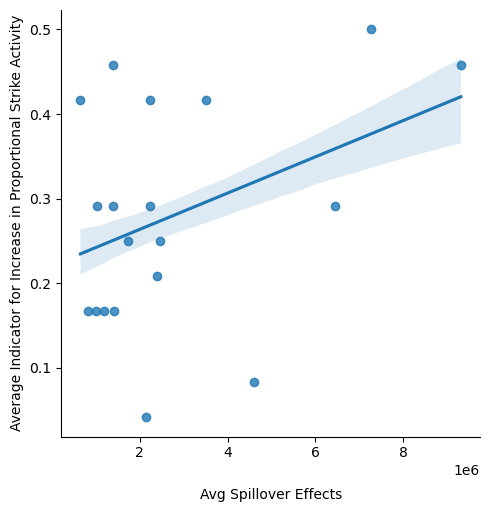

In [68]:
plt.figure(figsize=(25,20));
sns.lmplot(data = df_1.groupby('State').mean(),
           x = 'instrument_calc', y='change_prop_not_on_strike_indicator', fit_reg=True,ci=50);
#plt.title('The Average Instrumental Variable vs Average Endogenous Variable by State');
plt.xlabel('Avg Spillover Effects',labelpad=20);
plt.ylabel('Average Indicator for Increase in Proportional Strike Activity');

In [50]:
len(df_1['State'].unique())

19

In [51]:
df_2 = testing_df[['State','Year','strikers_diff','Priv Union Members (%)','prop_rep','Wage_Increase_Indicator','change_prop_not_on_strike','change_prop_not_on_strike_indicator','instrument_calc','us_inf']]
df_2 = df_2[df_2['State'].isin(index_2.tolist())]
df_2 = df_2[~df_2['prop_rep'].isna()]
df_2 = pd.concat([df_2, pd.get_dummies(df_2['Year']).drop(columns=[1994])],axis=1)
df_2.columns = [x for x in df_2.columns.tolist() if type(x)!=int] + ['yr'+str(x) for x in df_2.columns.tolist() if type(x)==int]
df_2
#All states without inflation data, 1994-2020

df_2[['Priv Union Members (%)','us_inf','prop_rep','change_prop_not_on_strike_indicator','Wage_Increase_Indicator',
      'instrument_calc']].to_csv("all_states_no_inflation.csv")


In [66]:
((df_2['us_inf']/100+1).prod()**(1/len(df_2['us_inf']))-1)*100

2.110169712145993

In [52]:
df_2.describe()[['Priv Union Members (%)','us_inf','prop_rep','change_prop_not_on_strike_indicator','Wage_Increase_Indicator','instrument_calc']]


,Priv Union Members (%),us_inf,prop_rep,change_prop_not_on_strike_indicator,Wage_Increase_Indicator,instrument_calc
count,864.000000,864.000000,864.000000,864.000000,864.000000,8.640000e+02
mean,7.926736,2.111111,46.161226,0.221065,0.364583,3.219565e+06
std,3.726034,0.438545,12.274142,0.415204,0.481592,1.471033e+07
min,1.200000,1.000000,0.000000,0.000000,0.000000,-9.663032e+03
25%,4.900000,1.800000,40.115674,0.000000,0.000000,-1.833559e+02
50%,7.800000,2.200000,46.594214,0.000000,0.000000,3.232298e+02
75%,10.300000,2.400000,53.909956,0.000000,1.000000,7.317261e+05
max,18.400000,3.000000,81.649972,1.000000,1.000000,2.150895e+08


In [53]:
df_3 = testing_df[['State','Year','strikers_diff','Priv Union Members (%)','Wage_Increase_Indicator','change_prop_not_on_strike','change_prop_not_on_strike_indicator','instrument_calc','us_inf']]
df_3 = df_3[df_3['State'].isin(index_2.tolist())]
df_3 = pd.concat([df_3, pd.get_dummies(df_3['Year']).drop(columns=[1994])],axis=1)
df_3.columns = [x for x in df_3.columns.tolist() if type(x)!=int] + ['yr'+str(x) for x in df_3.columns.tolist() if type(x)==int]
df_3
#All states without political lean data (including DC), 1994-2020

df_3[['Priv Union Members (%)','us_inf','change_prop_not_on_strike_indicator',
      'Wage_Increase_Indicator','instrument_calc']].to_csv("all_states_no_poli.csv")


In [67]:
((df_3['us_inf']/100+1).prod()**(1/len(df_3['us_inf']))-1)*100

2.110169712145993

In [54]:
df_3.describe()[['Priv Union Members (%)','us_inf','change_prop_not_on_strike_indicator','Wage_Increase_Indicator','instrument_calc']]


,Priv Union Members (%),us_inf,change_prop_not_on_strike_indicator,Wage_Increase_Indicator,instrument_calc
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,7.914366,2.111111,0.218855,0.368126,3.164306e+06
std,3.686385,0.438537,0.413702,0.482567,1.451806e+07
min,1.200000,1.000000,0.000000,0.000000,-9.663032e+03
25%,4.950000,1.800000,0.000000,0.000000,-1.769628e+02
50%,7.800000,2.200000,0.000000,0.000000,3.307819e+02
75%,10.200000,2.400000,0.000000,1.000000,7.209879e+05
max,18.400000,3.000000,1.000000,1.000000,2.150895e+08
